# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.

In [3]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

# Delay to allow the page to fully load
browser.is_element_present_by_css("table", wait_time=1)

# Get the HTML content of the website
html = browser.html


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a BeautifulSoup object
mars_weather_soup = soup(html, "html.parser")

# Find the HTML table containing the data
table = mars_weather_soup.find("table")

# Extract the table headers
headers = [header.text.strip() for header in table.find_all("th")]

# Extract the table rows
rows = table.find_all("tr")

# Initialize an empty list to store the scraped data
weather_data = []

# Iterate over the rows, skipping the header row
for row in rows[1:]:
    # Extract the data from each cell in the row
    cells = row.find_all("td")
    data_row = [cell.text.strip() for cell in cells]
    
    # Store the data in a dictionary with column names as keys
    row_data = dict(zip(headers, data_row))
    
    # Append the dictionary to the list of weather data
    weather_data.append(row_data)

# Convert the list of dictionaries to a Pandas DataFrame
weather_df = pd.DataFrame(weather_data)

# Display the DataFrame
print(weather_df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.

In [5]:
# Display the data types of each column
print(weather_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [6]:
# Convert 'terrestrial_date' column to datetime type
weather_df['terrestrial_date'] = pd.to_datetime(weather_df['terrestrial_date'])

# Convert 'sol', 'ls', and 'month' columns to int64
weather_df['sol'] = weather_df['sol'].astype('int64')
weather_df['ls'] = weather_df['ls'].astype('int64')
weather_df['month'] = weather_df['month'].astype('int64')

# Display the updated data types
print(weather_df.dtypes)


# Convert 'min_temp' and 'pressure' columns
weather_df['min_temp'] = pd.to_numeric(weather_df['min_temp'], errors='coerce')
weather_df['pressure'] = pd.to_numeric(weather_df['pressure'], errors='coerce')

# Display the updated data types
print(weather_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                    object
pressure                    object
dtype: object
id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.

In [7]:
# 1. How many months exist on Mars?
num_months = weather_df['terrestrial_date'].dt.month.nunique()
print("Number of months on Mars:", num_months)

# 2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
num_martian_days = weather_df['sol'].nunique()
print("Number of Martian days worth of data:", num_martian_days)

Number of months on Mars: 12
Number of Martian days worth of data: 1867


In [8]:
# 3. What is the average low temperature by month?
# Calculate the average low temperature by month
avg_low_temp_by_month = weather_df.groupby('month')['min_temp'].mean()

print("Average low temperature by month:\n", avg_low_temp_by_month)

Average low temperature by month:
 month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


In [9]:
# What are the coldest and warmest months on Mars (at the location of Curiosity)?

# Find the coldest month
coldest_month = avg_low_temp_by_month.idxmin()

# Find the warmest month
warmest_month = avg_low_temp_by_month.idxmax()

print("Coldest month:", coldest_month)
print("Warmest month:", warmest_month)


Coldest month: 3
Warmest month: 8


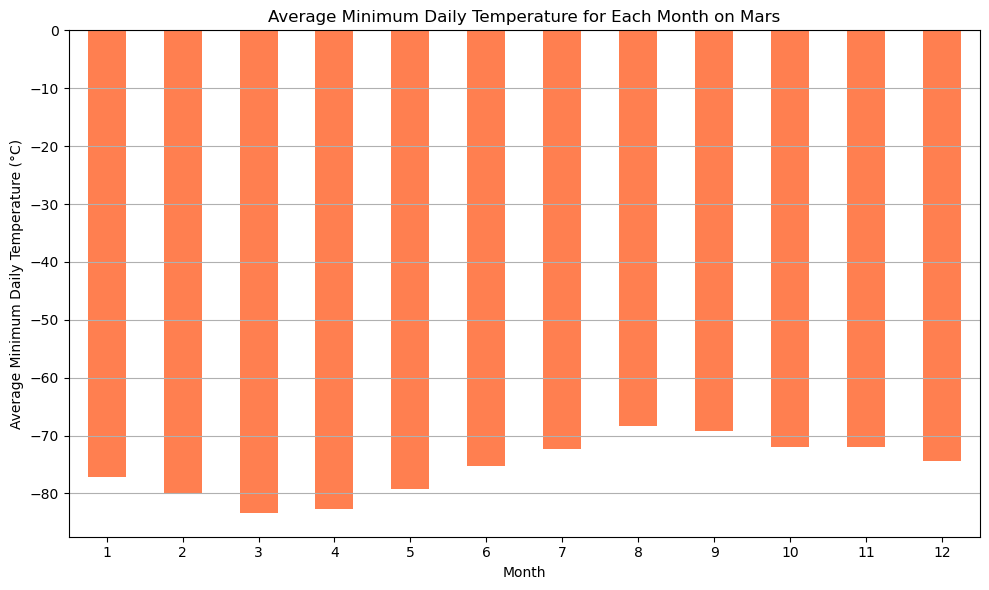

In [10]:
# Calculate the average minimum daily temperature for each month
monthly_avg_min_temp = weather_df.groupby('month')['min_temp'].mean()

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
monthly_avg_min_temp.plot(kind='bar', color='coral')
plt.title('Average Minimum Daily Temperature for Each Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Daily Temperature (°C)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

plt.savefig('resources/monthly_avg_min_temp_plot.png')

plt.show()

In [11]:
# Calculate the average pressure by Martian month
average_pressure_by_month = weather_df.groupby('month')['pressure'].mean()

# Convert to DataFrame and reset index
average_pressure_by_month = average_pressure_by_month.to_frame().reset_index()

# Print the result
print(average_pressure_by_month)


    month    pressure
0       1  862.488506
1       2  889.455056
2       3  877.322917
3       4  806.329897
4       5  748.557047
5       6  745.054422
6       7  795.105634
7       8  873.829787
8       9  913.305970
9      10  887.312500
10     11  857.014493
11     12  842.156627


In [18]:
# Which months have hte lowest and highest atmospheric pressure on Mars?

# Find the month with the lowest atmospheric pressure
lowest_pressure_month = average_pressure_by_month.loc[average_pressure_by_month['pressure'].idxmin()]

# Find the month with the highest atmospheric pressure
highest_pressure_month = average_pressure_by_month.loc[average_pressure_by_month['pressure'].idxmax()]

print("Month with the lowest atmospheric pressure:", lowest_pressure_month['month'])
print("Month with the highest atmospheric pressure:", highest_pressure_month['month'])


Month with the lowest atmospheric pressure: 6.0
Month with the highest atmospheric pressure: 9.0


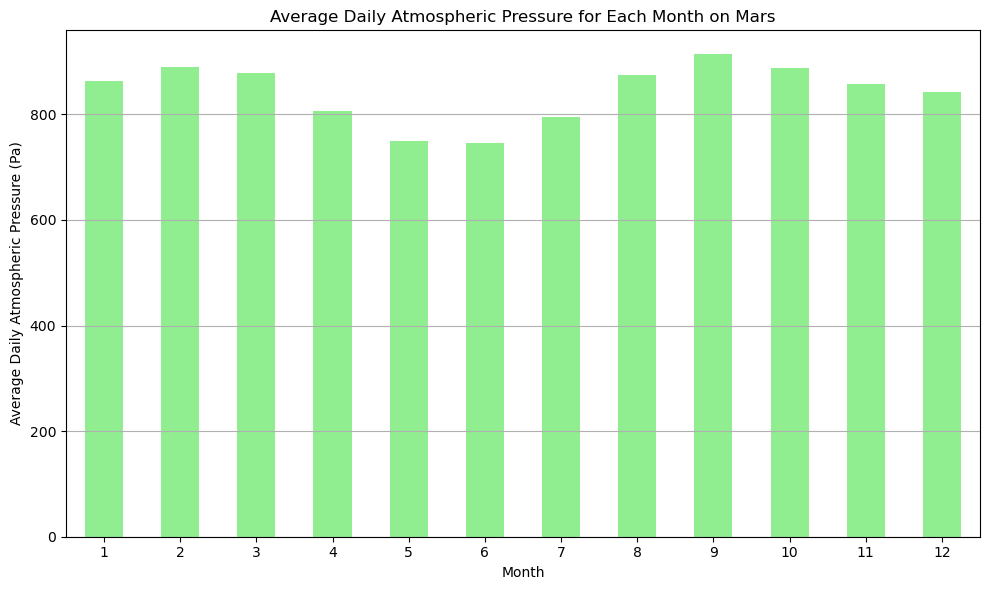

In [13]:
# Calculate the average daily atmospheric pressure for each month
monthly_avg_pressure = weather_df.groupby('month')['pressure'].mean()

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
monthly_avg_pressure.plot(kind='bar', color='lightgreen')
plt.title('Average Daily Atmospheric Pressure for Each Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Daily Atmospheric Pressure (Pa)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

plt.savefig('resources/monthly_avg_pressure_plot.png')

plt.show()

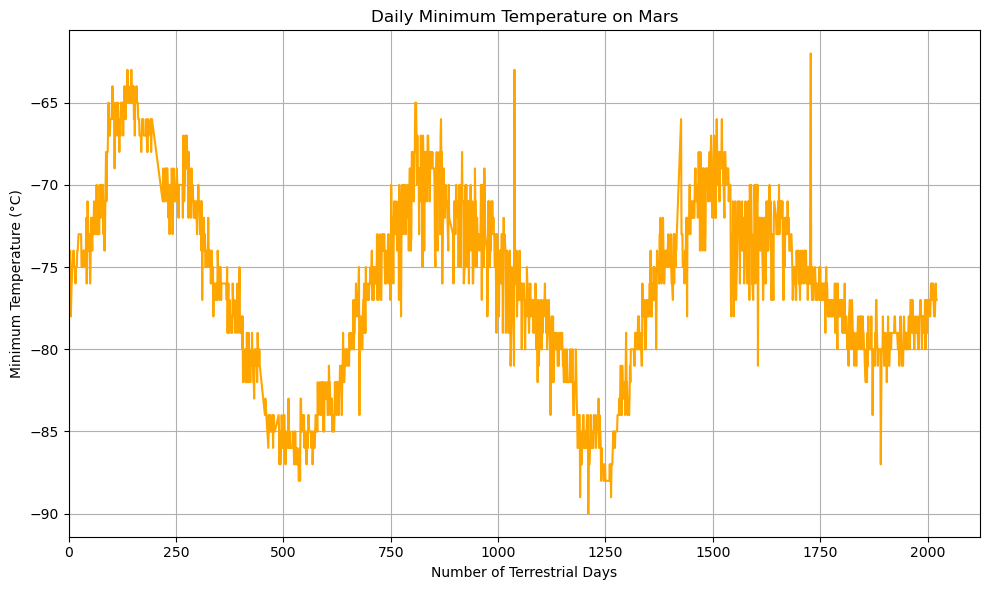

In [14]:
# Convert the date column to datetime format
weather_df['terrestrial_date'] = pd.to_datetime(weather_df['terrestrial_date'])

# Calculate the number of terrestrial days
weather_df['num_terrestrial_days'] = (weather_df['terrestrial_date'] - weather_df['terrestrial_date'].min()).dt.days

# Plot the daily minimum temperature
plt.figure(figsize=(10, 6))
plt.plot(weather_df['num_terrestrial_days'], weather_df['min_temp'], color='orange')
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.grid(True)
plt.tight_layout()

# Set x-axis limits to start from zero
plt.xlim(left=0)

plt.savefig('resources/mars_min_temp_plot.png')

plt.show()


In [19]:
# About how many terrestrial (Earth) days exist in a martian year?

# Calculate the number of terrestrial days in a Martian year
num_terrestrial_days_in_martian_year = (weather_df['terrestrial_date'].max() - weather_df['terrestrial_date'].min()).days

print("Number of terrestrial (Earth) days in a Martian year:", num_terrestrial_days_in_martian_year)


Number of terrestrial (Earth) days in a Martian year: 2021


In [16]:
# Define the file path for saving the CSV file
csv_file_path = "resources/mars_weather_data.csv"

# Save the DataFrame to a CSV file
weather_df.to_csv(csv_file_path, index=False)

print("Data has been saved to mars_weather_data.csv")

Data has been saved to mars_weather_data.csv


In [17]:
browser.quit()